# Zadanie 1
Pobieraj dane z pliku https://github.com/przem85/statistics/blob/master/D8/ANOVA4.txt
Zawiera on dane z eksperymentu na roślinach, które były hodowane w trzech  różnych warunki wzrostu. 

- Wykonaj ANOVA
- Czy trzy grupy są różne?
- Wykonaj analizę post hoc, który z par jest inny? 
- Czy porównanie nieparametryczne (Kruskal-Wallis test) prowadzi do innego wyniku? 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.libqsturng import psturng
from scipy.stats.mstats import kruskalwallis

In [2]:
data = pd.read_csv('ANOVA4.txt',sep=" ",header=None, names=['group','weight'])
data

,group,weight
0,Control,4.17
1,Control,5.58
2,Control,5.18
3,Control,6.11
4,Control,4.50
5,Control,4.61
6,Control,5.17
7,Control,4.53
8,Control,5.33
9,Control,5.14


In [19]:
d1 = data[data['group'] == 'Control'].weight
d2 = data[data['group'] == 'TreatmentA'].weight
d3 = data[data['group'] == 'TreatmentB'].weight

In [4]:
# Levena
(f, p) = stats.levene(d1,d2,d3)
print ('LEVENA ANOVA')
print ('=============')
print ('P value:', p)

LEVENA ANOVA
('P value:', 0.32927821561008164)


In [5]:
f, p = stats.f_oneway(d1,d2,d3)
print ('One-way ANOVA')
print ('=============')
print ('P value:', p)

One-way ANOVA
('P value:', 0.00695554199802733)


In [10]:
multiComp = MultiComparison(data['weight'], data['group'])

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
  group1     group2   meandiff  lower  upper  reject
----------------------------------------------------
 Control   TreatmentA  -0.373  -1.0638 0.3178 False 
 Control   TreatmentB  0.585   -0.1058 1.2758 False 
TreatmentA TreatmentB  0.958    0.2672 1.6488  True 
----------------------------------------------------


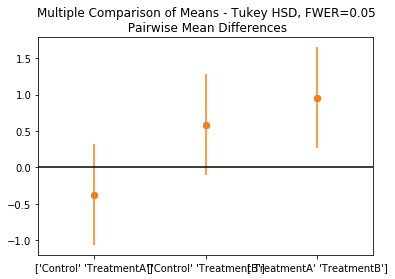

In [14]:
# Get the data
xvals = np.arange(3)
res2 = pairwise_tukeyhsd(data['weight'], data['group'])
print(res2)
errors = np.ravel(np.diff(res2.confint)/2)

# Plot them
plt.plot(xvals, res2.meandiffs, 'o')
plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt='o')

# Put on labels
pair_labels = multiComp.groupsunique[np.column_stack(res2._multicomp.pairindices)]
plt.xticks(xvals, pair_labels)

# Format the plot
xlim = -0.5, 2.5
plt.hlines(0, *xlim)
plt.xlim(*xlim)
plt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' + '\n Pairwise Mean Differences')          
plt.show()

In [25]:
# h, p = kruskalwallis(d1,d2,d3)

# # Print the results
# if p<0.05:
#     print('There is a significant difference between the cities.')
# else:
#     print('No significant difference between the cities.')